In [1]:
import pickle

with open('trainX.pkl', 'rb') as f:
    trainX = pickle.load(f)

with open('testX.pkl', 'rb') as f:
    testX = pickle.load(f)

with open('trainY.pkl', 'rb') as f:
    trainY = pickle.load(f)

with open('testY.pkl', 'rb') as f:
    testY = pickle.load(f)

with open('valX.pkl', 'rb') as f:
    valX = pickle.load(f)

with open('valY.pkl', 'rb') as f:
    valY = pickle.load(f)

with open('le.pkl', 'rb') as f:
    le = pickle.load(f)


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D,Input
from tensorflow.keras.layers import Activation, Dropout,BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
s=150
batch_size = 40
epochs = 20

In [4]:
model_base = VGG16(input_shape = (s,s,3), include_top = False)

In [5]:
x = Flatten()(model_base.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(4, activation='sigmoid')(x)
model = keras.models.Model(model_base.input, x)
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    mode = 'auto',
    min_delta = 0,
    patience = 3,
    verbose = 1,
    restore_best_weights = True
)

In [10]:
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,width_shift_range=0.2, 
                         height_shift_range=0.2, shear_range=0.15,
                         horizontal_flip=True, fill_mode="nearest")

In [11]:
vgghist = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), 
                     epochs=epochs,
                     callbacks = [early_stopping],
                     validation_data = (valX,valY),
                     verbose=1
)

Epoch 1/20
339/339 [==============================] - 127s 352ms/step - loss: 0.3971 - acc: 0.6393 - val_loss: 0.2380 - val_acc: 0.7951
Epoch 2/20
339/339 [==============================] - 110s 326ms/step - loss: 0.2806 - acc: 0.7736 - val_loss: 0.2000 - val_acc: 0.8462
Epoch 3/20
339/339 [==============================] - 111s 326ms/step - loss: 0.2299 - acc: 0.8225 - val_loss: 0.1931 - val_acc: 0.8468
Epoch 4/20
339/339 [==============================] - 111s 326ms/step - loss: 0.2069 - acc: 0.8433 - val_loss: 0.1554 - val_acc: 0.8751
Epoch 5/20
339/339 [==============================] - 111s 326ms/step - loss: 0.1890 - acc: 0.8581 - val_loss: 0.1647 - val_acc: 0.8943
Epoch 6/20
339/339 [==============================] - 111s 326ms/step - loss: 0.1839 - acc: 0.8635 - val_loss: 0.1454 - val_acc: 0.8846
Epoch 7/20
339/339 [==============================] - 111s 326ms/step - loss: 0.1719 - acc: 0.8767 - val_loss: 0.2152 - val_acc: 0.8474
Epoch 8/20
339/339 [============================

In [12]:
modelLoss, modelAccuracy = model.evaluate(aug.flow(testX, testY))

print('Test Loss is {}'.format(modelLoss))
print('Test Accuracy is {}'.format(modelAccuracy ))



133/133 [==============================] - 14s 100ms/step - loss: 0.1590 - acc: 0.8724
Test Loss is 0.15901975333690643
Test Accuracy is 0.8724309206008911


In [13]:
# modelLoss, modelAccuracy = model.evaluate(aug.flow(trainX, trainY))

# print('Test Loss is {}'.format(modelLoss))
# print('Test Accuracy is {}'.format(modelAccuracy ))


In [14]:
# classification report on train
# predIdxs = model.predict(taug.flow(rainX), batch_size=batch_size)
# predIdxs = np.argmax(predIdxs, axis=1)
# print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

In [15]:
# classification report on test

predIdxs = model.predict(testX, batch_size=batch_size)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits = 5))

              precision    recall  f1-score   support

    Covid-19    0.97500   0.70124   0.81577       723
Lung Opacity    0.88508   0.85857   0.87162      1202
      Normal    0.84615   0.97646   0.90665      2039
   Pneumonia    0.98454   0.71004   0.82505       269

    accuracy                        0.87905      4233
   macro avg    0.92269   0.81158   0.85477      4233
weighted avg    0.88801   0.87905   0.87599      4233



In [16]:
class_names = ['Covid-19', 'Lung Opacity', 'Normal', 'Pneumonia']
y_pred = model.predict(testX)
print(class_names[np.argmax(y_pred[11])])

Lung Opacity


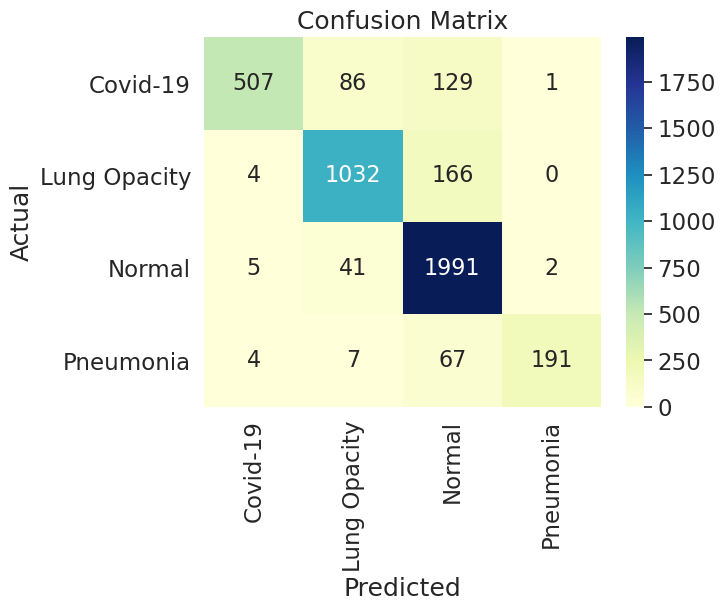

In [17]:
# Plotting Confusion Matrix
x = confusion_matrix(testY.argmax(axis=1),y_pred.argmax(axis=1))
Confusion_Matrix = pd.DataFrame(x,index=class_names, columns=class_names)

sns.set(font_scale=1.5, color_codes=True, palette='deep')
sns.heatmap(Confusion_Matrix, annot=True, annot_kws={'size':16}, fmt='d', cmap='YlGnBu')

plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

In [18]:
plt.plot(vgghist.history['acc'], label='accuracy')
plt.plot(vgghist.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='center right')


In [19]:
model.save('vgg16_model.h5') 